Title: My Title
Authors : 
  "Author1": Juan David Alonso 
  "Author2": Amel Cherbi

In [57]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<hr>
<h2>Description</h2>
<p>Le jeu de données contenu dans train.csv décrit des candidatures au poste de
chercheur d’or chez OrFée.<br>

<p>Le jeu de données comporte 12 colonnes :<br>
• <b>id</b>  : identifiant unique de chaque ligne<br>
• <b>date</b>  : date de la candidature<br>
•  <b>age</b>: âge du candidat<br>
•  <b>diplome</b>: plus haut diplôme obtenu (bac, licence, master, doctorat)<br>
• <b>specialite</b> : spécialité du diplôme (géologie, forage, détective, archéologie, . . . )<br>
• <b>salaire</b>: salaire demandé<br>
• <b>dispo</b>: oui : disponibilité immédiate, non : pas disponible immédiatement<br>
• <b>sexe</b>: féminin (F) ou masculin (M)<br>
• <b>exp</b> : nombre d’années d’expérience<br>
• <b>cheveux</b> : couleur des cheveux (châtain, brun, blond, roux)<br>
• <b>note</b> : note (sur 100) obtenue à l’exercice de recherche d’or<br>
• <b>embauche</b> : le candidat a-t-il été embauché ? (0 : non, 1 : oui) <br>

In [58]:
df = pd.read_csv(r'../data/data.csv',sep=',') # Adapatation du séparateur
df.shape

(20000, 11)

In [59]:
df.sample(5)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
9613,19/12/2013,blond,24.0,9.0,34098.0,F,bac,archeologie,86.48,non,1
2583,21/04/2013,roux,24.0,8.0,39442.0,M,licence,forage,86.65,oui,0
559,08/03/2013,chatain,39.0,8.0,34102.0,M,doctorat,detective,70.59,oui,1
17440,01/03/2010,blond,20.0,5.0,36946.0,F,bac,geologie,60.97,non,0
7719,22/07/2013,brun,25.0,8.0,32658.0,F,master,detective,92.93,oui,0


In [60]:
df.columns

Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

# <span style="color:#011C5D">Analyse descriptive </span>

In [61]:
df.describe


<bound method NDFrame.describe of              date  cheveux   age   exp  salaire sexe   diplome specialite  \
0      02/06/2012     roux  25.0   9.0  26803.0    F   licence   geologie   
1      21/04/2011    blond  35.0  13.0  38166.0    M   licence     forage   
2      07/09/2012    blond  29.0  13.0  35207.0    M   licence   geologie   
3      01/07/2011     brun   NaN  12.0  32442.0    M   licence   geologie   
4      07/08/2012     roux  35.0   6.0  28533.0    F   licence  detective   
...           ...      ...   ...   ...      ...  ...       ...        ...   
19995  10/03/2012     roux  47.0   9.0  35723.0    M   licence   geologie   
19996  19/09/2010  chatain  38.0  10.0  33570.0    F    master   geologie   
19997  02/09/2010  chatain  23.0   6.0  33751.0    F  doctorat  detective   
19998  06/12/2011  chatain  33.0  11.0  34167.0    F   licence  detective   
19999  29/11/2010     brun  35.0  14.0  44499.0    M       bac   geologie   

         note dispo  embauche  
0       9

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19895 non-null  object 
 2   age         19909 non-null  object 
 3   exp         19904 non-null  object 
 4   salaire     19905 non-null  object 
 5   sexe        19900 non-null  object 
 6   diplome     19891 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


### <span style="color:#011C5D">1. Identifier les variables numeriques et categorielles </span>

In [63]:
# EXERCICE : 

# Identifions tout d'abord les colonnes catégorielles
col_categoricals = df.select_dtypes(include=['object'])

# Puis les numériques
col_numericals = df.select_dtypes(include=['number'])


print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
             date  cheveux   age   exp  salaire sexe   diplome specialite  \
0      02/06/2012     roux  25.0   9.0  26803.0    F   licence   geologie   
1      21/04/2011    blond  35.0  13.0  38166.0    M   licence     forage   
2      07/09/2012    blond  29.0  13.0  35207.0    M   licence   geologie   
3      01/07/2011     brun   NaN  12.0  32442.0    M   licence   geologie   
4      07/08/2012     roux  35.0   6.0  28533.0    F   licence  detective   
...           ...      ...   ...   ...      ...  ...       ...        ...   
19995  10/03/2012     roux  47.0   9.0  35723.0    M   licence   geologie   
19996  19/09/2010  chatain  38.0  10.0  33570.0    F    master   geologie   
19997  02/09/2010  chatain  23.0   6.0  33751.0    F  doctorat  detective   
19998  06/12/2011  chatain  33.0  11.0  34167.0    F   licence  detective   
19999  29/11/2010     brun  35.0  14.0  44499.0    M       bac   geologie   

      dispo  
0       non  
1       non 

In [ ]:
# Convertir les données numerique au bon format "SI BESOIN"
#### CODEZ-ICI ####
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype("Int64")
df['exp'] = pd.to_numeric(df['exp'], errors='coerce').astype("Int64")
df['salaire'] = pd.to_numeric(df['salaire'], errors='coerce')
df['dispo'] = df['dispo'].astype("bool")
df['embauche'] = df['embauche'].astype("bool")
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        19909 non-null  datetime64[ns]
 1   cheveux     19895 non-null  object        
 2   age         19899 non-null  Int64         
 3   exp         19894 non-null  Int64         
 4   salaire     19895 non-null  float64       
 5   sexe        19900 non-null  object        
 6   diplome     19891 non-null  object        
 7   specialite  19907 non-null  object        
 8   note        19886 non-null  float64       
 9   dispo       20000 non-null  bool          
 10  embauche    20000 non-null  bool          
dtypes: Int64(2), bool(2), datetime64[ns](1), float64(2), object(4)
memory usage: 1.4+ MB


In [65]:
col_categoricals = ["cheveux", "sexe", "diplome", "specialite"]
col_numericals = ["age", "exp", "salaire", "note"]

print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")


Liste des colonnes catégorielles :
['cheveux', 'sexe', 'diplome', 'specialite']

Liste des colonnes numériques :
['age', 'exp', 'salaire', 'note']


### <span style="color:#011C5D">2. Analyse de la distribution des variables numeriques </span>

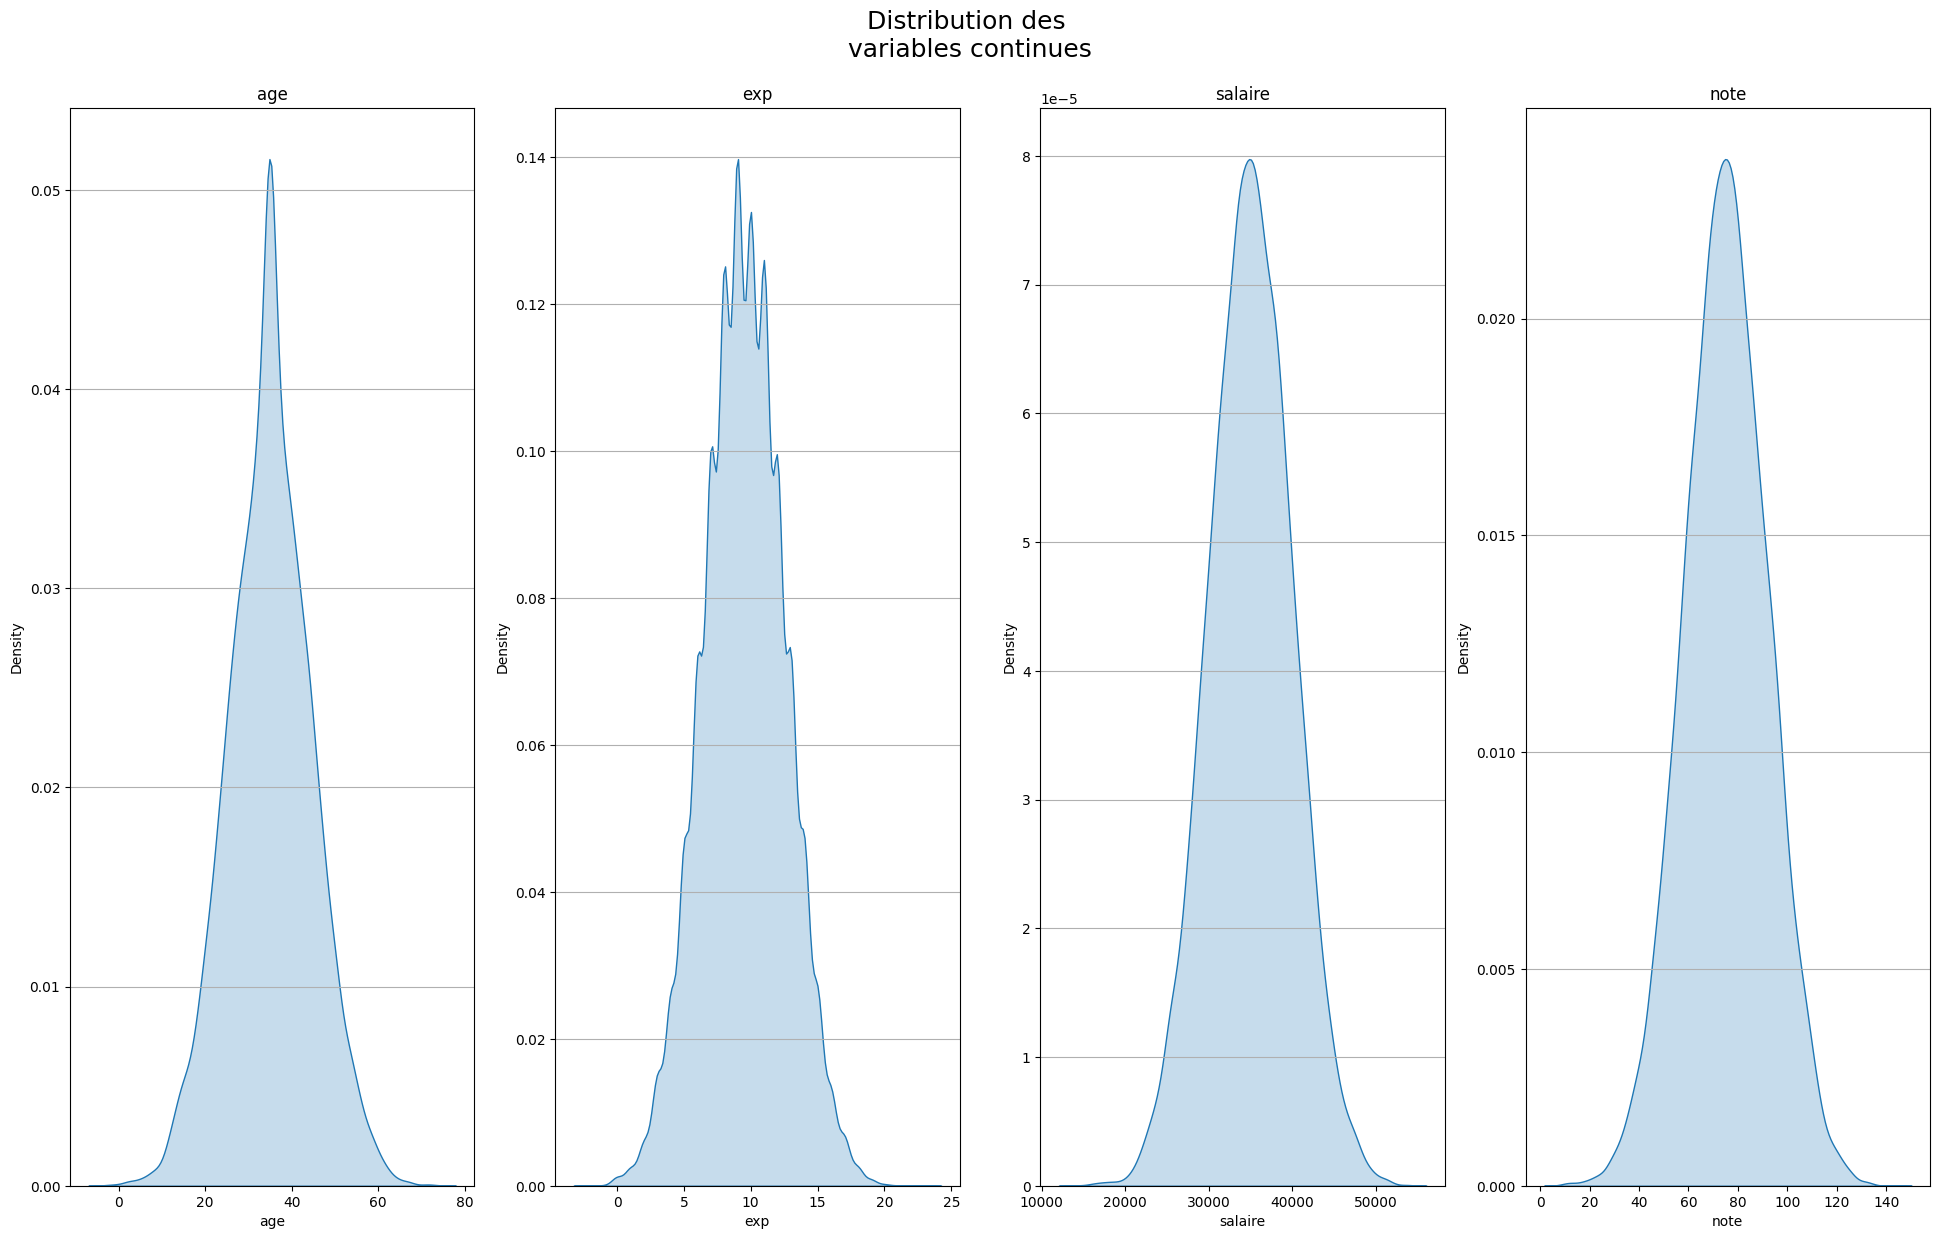

In [66]:
ncols = 4
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(24, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 

for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(data=df[variable], ax=ax, fill="True",legend=None, shade=True)
    ax.grid(True, which='major', axis='y')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [67]:
df.describe()

,date,age,exp,salaire,note
count,19909,19899.0,19894.0,19895.000000,19886.000000
mean,2012-07-02 18:06:18.642824960,35.004473,9.498794,34975.703443,75.168762
min,2010-01-01 00:00:00,-3.0,-2.0,14128.000000,8.680000
25%,2011-03-29 00:00:00,29.0,7.0,31597.000000,63.720000
50%,2012-07-03 00:00:00,35.0,9.0,34979.000000,75.080000
75%,2013-10-04 00:00:00,41.0,12.0,38361.000000,86.617500
max,2014-12-31 00:00:00,74.0,23.0,53977.000000,143.220000
std,NaN,9.609154,3.011427,5003.151060,17.095926


Il y a des valeurs extrêmes incohérentes dans les variables age, exp et note. 
Un age ne peut pas être inférieur à 0 , une expérience non plus. 
Une note ne peut pas être supérieur à 100. 

### <span style="color:#011C5D">3. Matrice de correlation </span>

<Axes: >

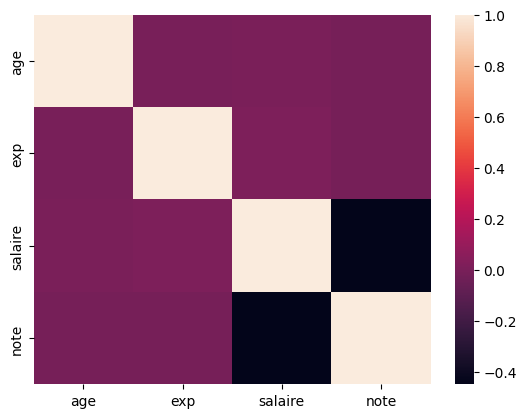

In [68]:
# EXERCICE : 

# Calculer la correlation entre les variables numeriques

matrice_corr = df[col_numericals].corr()
# Afficher un heatmap de la matrice de correlation 
sns.heatmap(matrice_corr)


# Que pouvez-vous conclure ?

Il existe une faible corrélation négative entre salaire et note. (-0.4) 

### <span style="color:#011C5D">4. Identification des valeurs manquantes </span>

In [69]:
df.count()

date          19909
cheveux       19895
age           19899
exp           19894
salaire       19895
sexe          19900
diplome       19891
specialite    19907
note          19886
dispo         20000
embauche      20000
dtype: int64

In [70]:
df.isna().sum()

date           91
cheveux       105
age           101
exp           106
salaire       105
sexe          100
diplome       109
specialite     93
note          114
dispo           0
embauche        0
dtype: int64

In [ ]:
df = df.replace(" ", np.nan)


In [72]:
df["cheveux"].value_counts()

cheveux
chatain    6020
brun       5985
blond      5927
roux       1953
Name: count, dtype: int64

In [73]:
df.isna().sum()

date           91
cheveux       115
age           101
exp           106
salaire       105
sexe          110
diplome       119
specialite    103
note          114
dispo           0
embauche        0
dtype: int64

In [74]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux
#            de valeurs manquantes de chaque variable pour chaque type (catégorielle et numérique)
#            par ordre décroissant


def display_missing_values(df):
    missing = df.isnull().mean()*100
    missing = missing[missing > 0].sort_values(ascending=True)
    print("\n Les taux de valeurs manquantes (en %) : \n", missing)
        
        
    
    
#### CODEZ-ICI ####

print( "Les variables numériques : ")
display_missing_values(df[col_numericals])
print( "\n ")

print( "Les variables categorielles : ")
display_missing_values(df[col_categoricals])
# Que pouvez-vous conclure ?


Les variables numériques : 

 Les taux de valeurs manquantes (en %) : 
 age        0.505
salaire    0.525
exp        0.530
note       0.570
dtype: float64

 
Les variables categorielles : 

 Les taux de valeurs manquantes (en %) : 
 specialite    0.515
sexe          0.550
cheveux       0.575
diplome       0.595
dtype: float64


Faible taux de valeurs manquantes. Moins de 1% pour la colonne avec le plus de % de valeurs manquantes. 

### <span style="color:#011C5D">5. Imputation des valeurs manquantes </span>

#### <span style="color:#011C5D">5.1 Variables numeriques </span>

##### <span style="color:#011C5D">5.1.1 Imputation par la moyenne </span>

In [75]:
# EXERCICE : Imputation des variables numériques avec la moyenne
# Les variables imputées sont enregistrées dans de nouvelles colonnes.
for n in col_numericals:
    if n =="age" or n=="exp":
        df[n + "_imputation_moyenne"] = df[n].fillna(round(df[n].mean())).astype("Int64")
    else:
        df[n + "_imputation_moyenne"] = df[n].fillna(df[n].mean())

print(df.columns)



Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche', 'age_imputation_moyenne',
       'exp_imputation_moyenne', 'salaire_imputation_moyenne',
       'note_imputation_moyenne'],
      dtype='object')


In [76]:
print(df[df['age'].isna()].head())

          date  cheveux   age  exp  salaire sexe   diplome   specialite  \
3   2011-07-01     brun  <NA>   12  32442.0    M   licence     geologie   
59  2010-04-05  chatain  <NA>    9  40992.0    F    master  archeologie   
108 2012-08-31  chatain  <NA>    9  34463.0    F    master     geologie   
137 2014-03-18     brun  <NA>    3  30439.0    M  doctorat     geologie   
551 2012-12-06  chatain  <NA>    7  27457.0    F  doctorat    detective   

       note  dispo  embauche  age_imputation_moyenne  exp_imputation_moyenne  \
3     45.09   True     False                      35                      12   
59    79.33   True     False                      35                       9   
108   51.43   True      True                      35                       9   
137  102.43   True      True                      35                       3   
551  118.66   True     False                      35                       7   

     salaire_imputation_moyenne  note_imputation_moyenne  
3        

##### <span style="color:#011C5D">5.1.2 Imputation par la regression </span>

In [77]:
#EXERCICE : Imputation par régression
# Laissez libre cours à votre créativité !
# Pour chaque variable numérique contenant des valeurs manquantes, utilisez les variables explicatives appropriées afin d’imputer les valeurs manquantes à l’aide d’une méthode de régression.

In [78]:

def impute_by_regression(df):
    df_num = df[col_numericals]
    imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns, index=df.index)

    for n in col_numericals:
        if n =="age" or n=="exp":
            df[f"{n}_imputation_regression"] = df[n].fillna(round(df_imputed[n])).astype("Int64")
        else:
            df[f"{n}_imputation_regression"] = df[n].fillna(df_imputed[n])

impute_by_regression(df)

In [79]:
df[df['salaire_imputation_moyenne']!=df['salaire_imputation_regression']].head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,age_imputation_moyenne,exp_imputation_moyenne,salaire_imputation_moyenne,note_imputation_moyenne,age_imputation_regression,exp_imputation_regression,salaire_imputation_regression,note_imputation_regression
26,2013-04-12,brun,33,8,NaN,F,licence,detective,56.99,True,False,33,8,34975.703443,56.99,33,8,37361.388456,56.99
281,2010-07-30,blond,37,13,NaN,M,licence,geologie,69.01,True,False,37,13,34975.703443,69.01,37,13,35810.388441,69.01
423,2012-12-19,brun,42,15,NaN,M,master,forage,67.87,True,False,42,15,34975.703443,67.87,42,15,35970.377670,67.87
508,2012-11-07,chatain,39,15,NaN,F,doctorat,forage,110.52,True,False,39,15,34975.703443,110.52,39,15,30352.005759,110.52
1184,2012-04-22,brun,16,13,NaN,M,master,detective,85.80,True,False,16,13,34975.703443,85.80,16,13,33619.565478,85.80


##### <span style="color:#011C5D">5.1.3 Comparer la distribution des variables imputer </span>

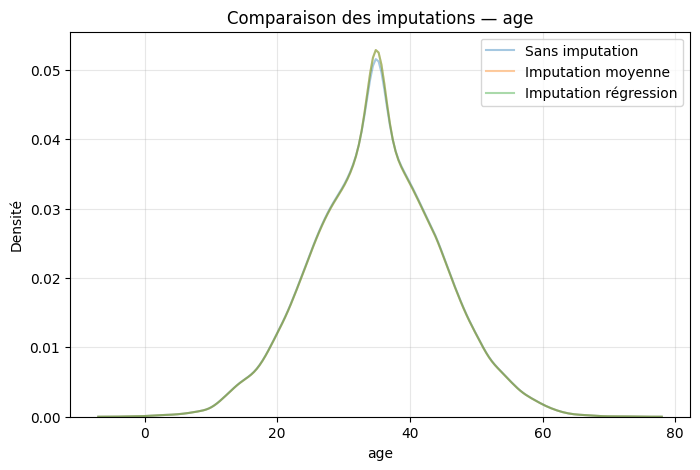

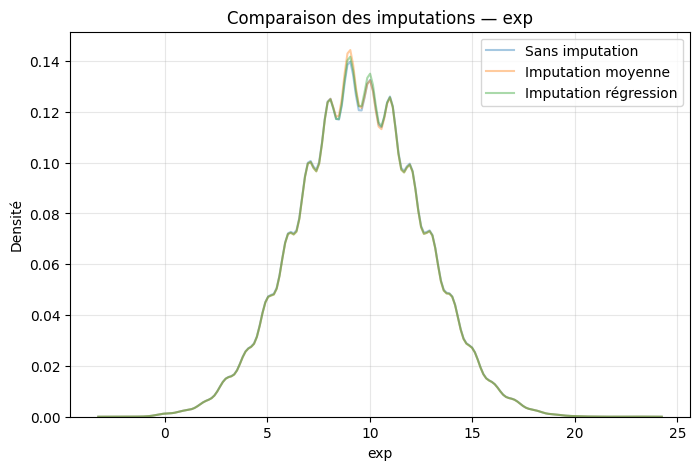

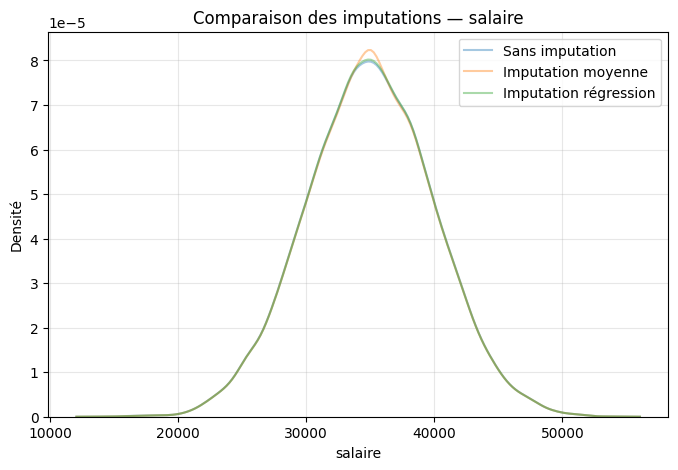

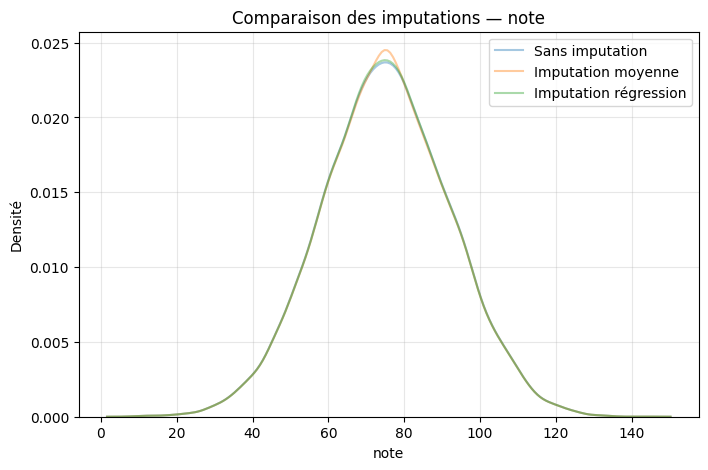

In [80]:
# EXERCICE : Laissez libre court à votre créativité 
# Pour chaque variable numerique
# Comparer la distribution entre l'imputation par la moyenne et l'imputation par Regression

for col in col_numericals:
    plt.figure(figsize=(8, 5))

    # Densité sans imputation
    sns.kdeplot(df[f"{col}"], label="Sans imputation", alpha=0.4)
    
    # Densité après imputation par moyenne
    sns.kdeplot(df[f"{col}_imputation_moyenne"], label="Imputation moyenne", alpha=0.4)
    
    # Densité après imputation par régression
    sns.kdeplot(df[f"{col}_imputation_regression"], label="Imputation régression", alpha=0.4)
    
    plt.title(f"Comparaison des imputations — {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [81]:
# Que pouvez-vous conclure ?

Peu de changement de distribution, pour les deux types d'imputations. Pour l'imputauion par la moyenne, on ajoute des observations pour la moyenne donc le pic à la moyenne est un peu plus important . 

#### <span style="color:#011C5D">5.2 Variables categorielles </span>

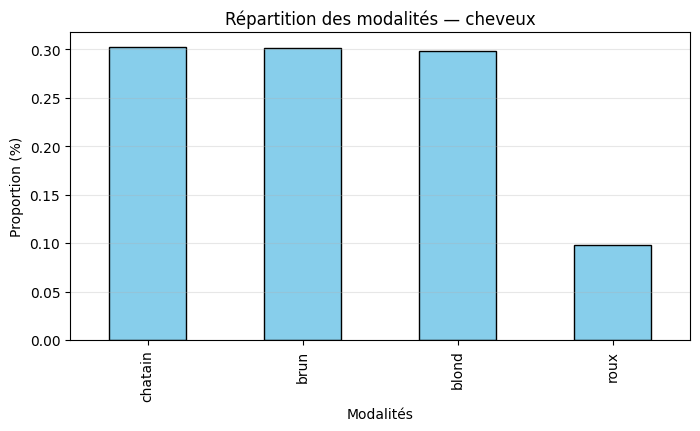

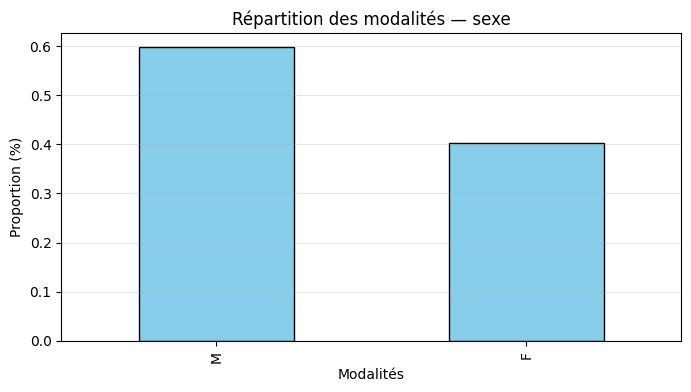

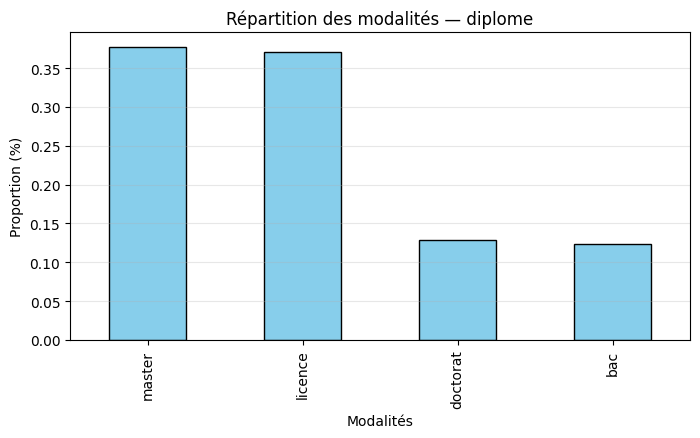

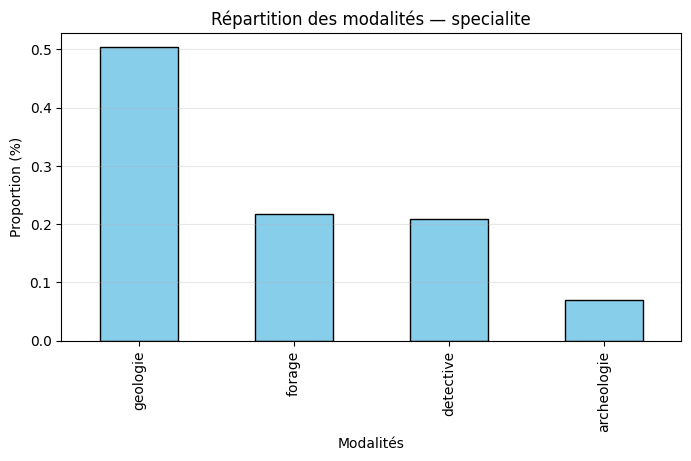

In [82]:
# EXERCICE : Utiliser une methode adequate pour imputer les variables categorielles
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_categoricals:
    plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Répartition des modalités — {col}")
    plt.xlabel("Modalités")
    plt.ylabel("Proportion (%)")
    plt.grid(axis="y", alpha=0.3)
    plt.show()



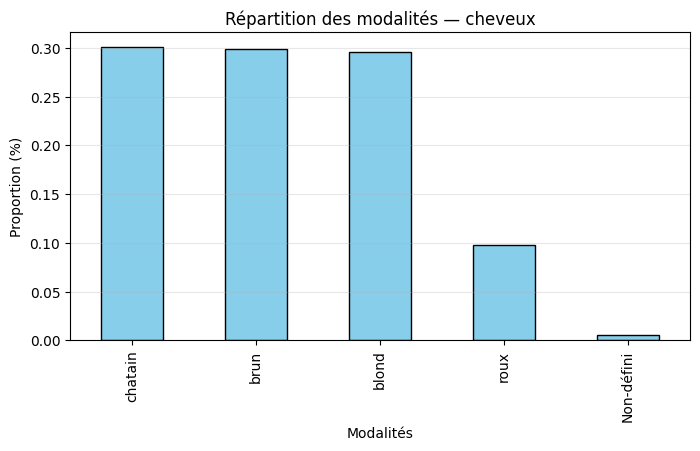

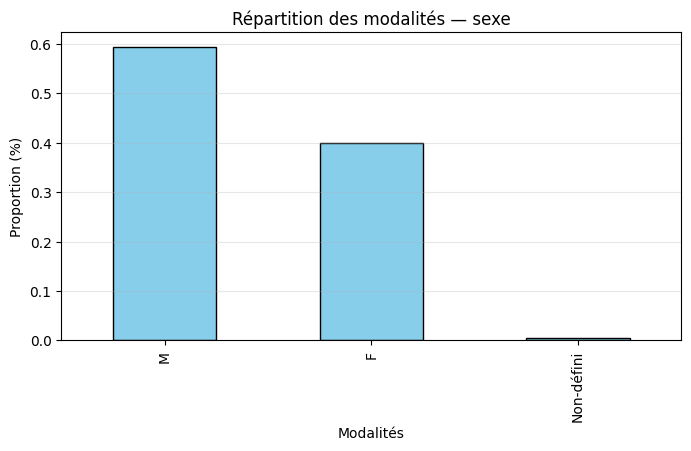

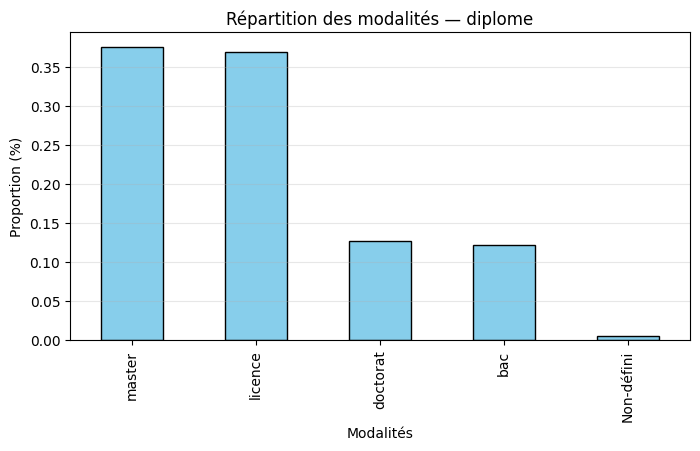

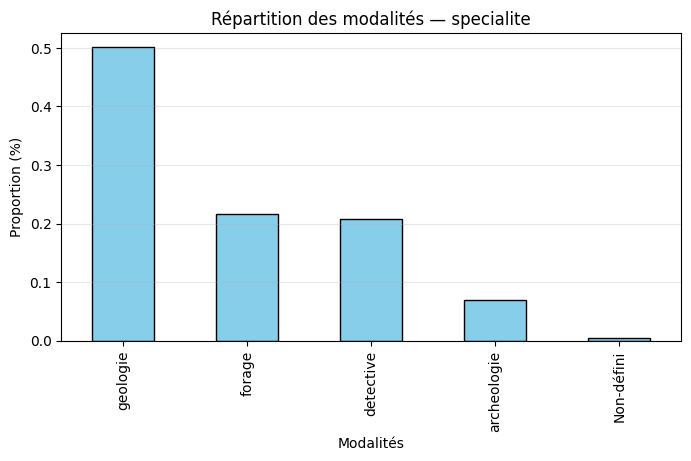

In [ ]:
df[col_categoricals] = df[col_categoricals].fillna("Non-défini")

for col in col_categoricals:
    plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Répartition des modalités — {col}")
    plt.xlabel("Modalités")
    plt.ylabel("Proportion (%)")
    plt.grid(axis="y", alpha=0.3)
    plt.show()




Nous avons choisi d’imputer les valeurs manquantes par la modalité « Non-défini », car celles-ci sont porteuses d’information : elles correspondent à des cas qui ne s’inscrivent pas dans les modalités existantes.

### <span style="color:#011C5D">6. Detection des outliers </span>

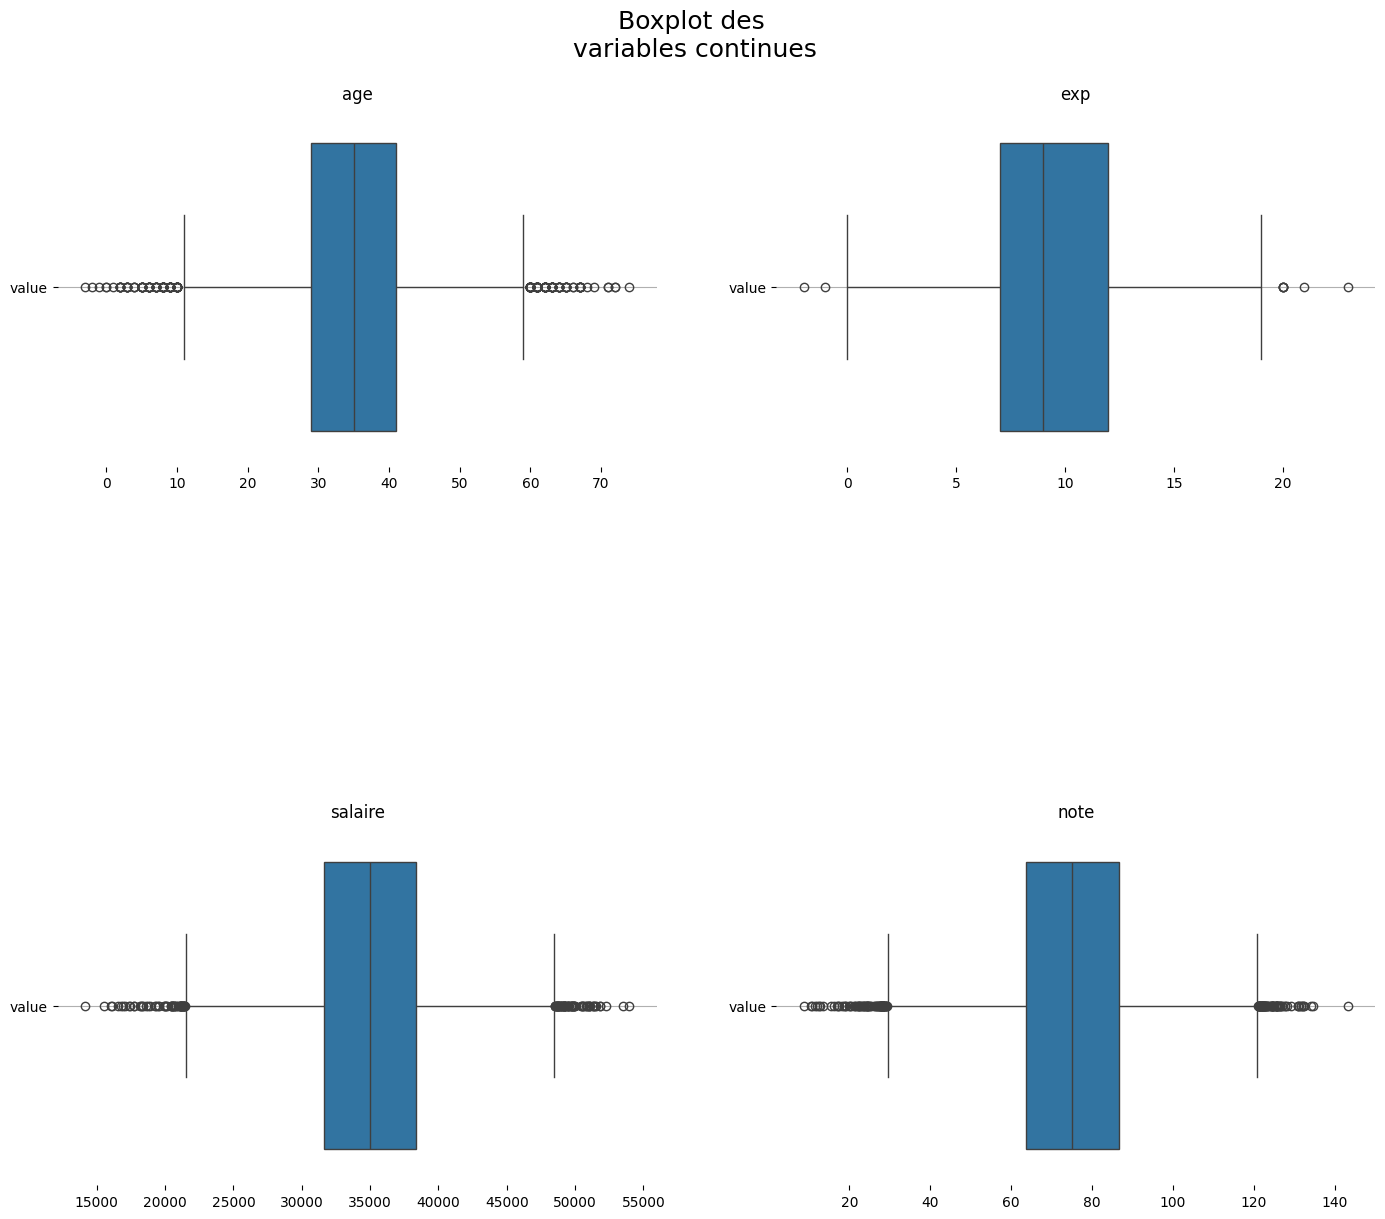

In [84]:
# On affiche les boxplots
temp=pd.melt(df[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]

ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [85]:
# EXERCICE : Completer cette fonction qui retourne 0 ou 1 si la valeur observée est outlier ou pas 

def is_outlier(df,column) :
    
    # 1er Quartile 
    Q1 = np.quantile(df[column], 0.25)
    
    # 3ème Quartile 
    Q3 = np.quantile(df[column], 0.75)
    
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # limites, basse & haute
    limite_inf = Q1 -1.5*IQR
    print( f"pour la variable {column} , limite inf = {limite_inf}")
    limite_sup = Q3 +1.5*IQR
    print( f"pour la variable {column} , limite sup = {limite_sup}")
    # Remplace les données inférieur et supérieur à la limite par 1 et les autres par 0
    series =((df[column] > limite_sup) | (df[column] < limite_inf)).astype(int)

    return series

In [86]:
# EXERCICE : Appliquer votre fonction aux variables numeriques
for col in col_numericals:
    column_imputed=f"{col}_imputation_regression"
    df[f"{col}_is_outliers"] = is_outlier(df, column_imputed)

df.head()

pour la variable age_imputation_regression , limite inf = 11.0
pour la variable age_imputation_regression , limite sup = 59.0
pour la variable exp_imputation_regression , limite inf = -0.5
pour la variable exp_imputation_regression , limite sup = 19.5
pour la variable salaire_imputation_regression , limite inf = 21492.0
pour la variable salaire_imputation_regression , limite sup = 48462.0
pour la variable note_imputation_regression , limite inf = 29.634999999999998
pour la variable note_imputation_regression , limite sup = 120.715


,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,...,salaire_imputation_moyenne,note_imputation_moyenne,age_imputation_regression,exp_imputation_regression,salaire_imputation_regression,note_imputation_regression,age_is_outliers,exp_is_outliers,salaire_is_outliers,note_is_outliers
0,2012-06-02,roux,25,9,26803.0,F,licence,geologie,97.08,True,...,26803.0,97.08,25,9,26803.0,97.08,0,0,0,0
1,2011-04-21,blond,35,13,38166.0,M,licence,forage,63.86,True,...,38166.0,63.86,35,13,38166.0,63.86,0,0,0,0
2,2012-09-07,blond,29,13,35207.0,M,licence,geologie,78.50,True,...,35207.0,78.50,29,13,35207.0,78.50,0,0,0,0
3,2011-07-01,brun,<NA>,12,32442.0,M,licence,geologie,45.09,True,...,32442.0,45.09,35,12,32442.0,45.09,0,0,0,0
4,2012-08-07,roux,35,6,28533.0,F,licence,detective,81.91,True,...,28533.0,81.91,35,6,28533.0,81.91,0,0,0,0


In [87]:
for col in col_numericals:
    print(df[f"{col}_is_outliers"].value_counts())

age_is_outliers
0    19785
1      215
Name: count, dtype: int64
exp_is_outliers
0    19992
1        8
Name: count, dtype: int64
salaire_is_outliers
0    19874
1      126
Name: count, dtype: int64
note_is_outliers
0    19847
1      153
Name: count, dtype: int64


  variable  value
0      age   25.0
1      age   35.0
2      age   29.0
3      age   <NA>
4      age   35.0


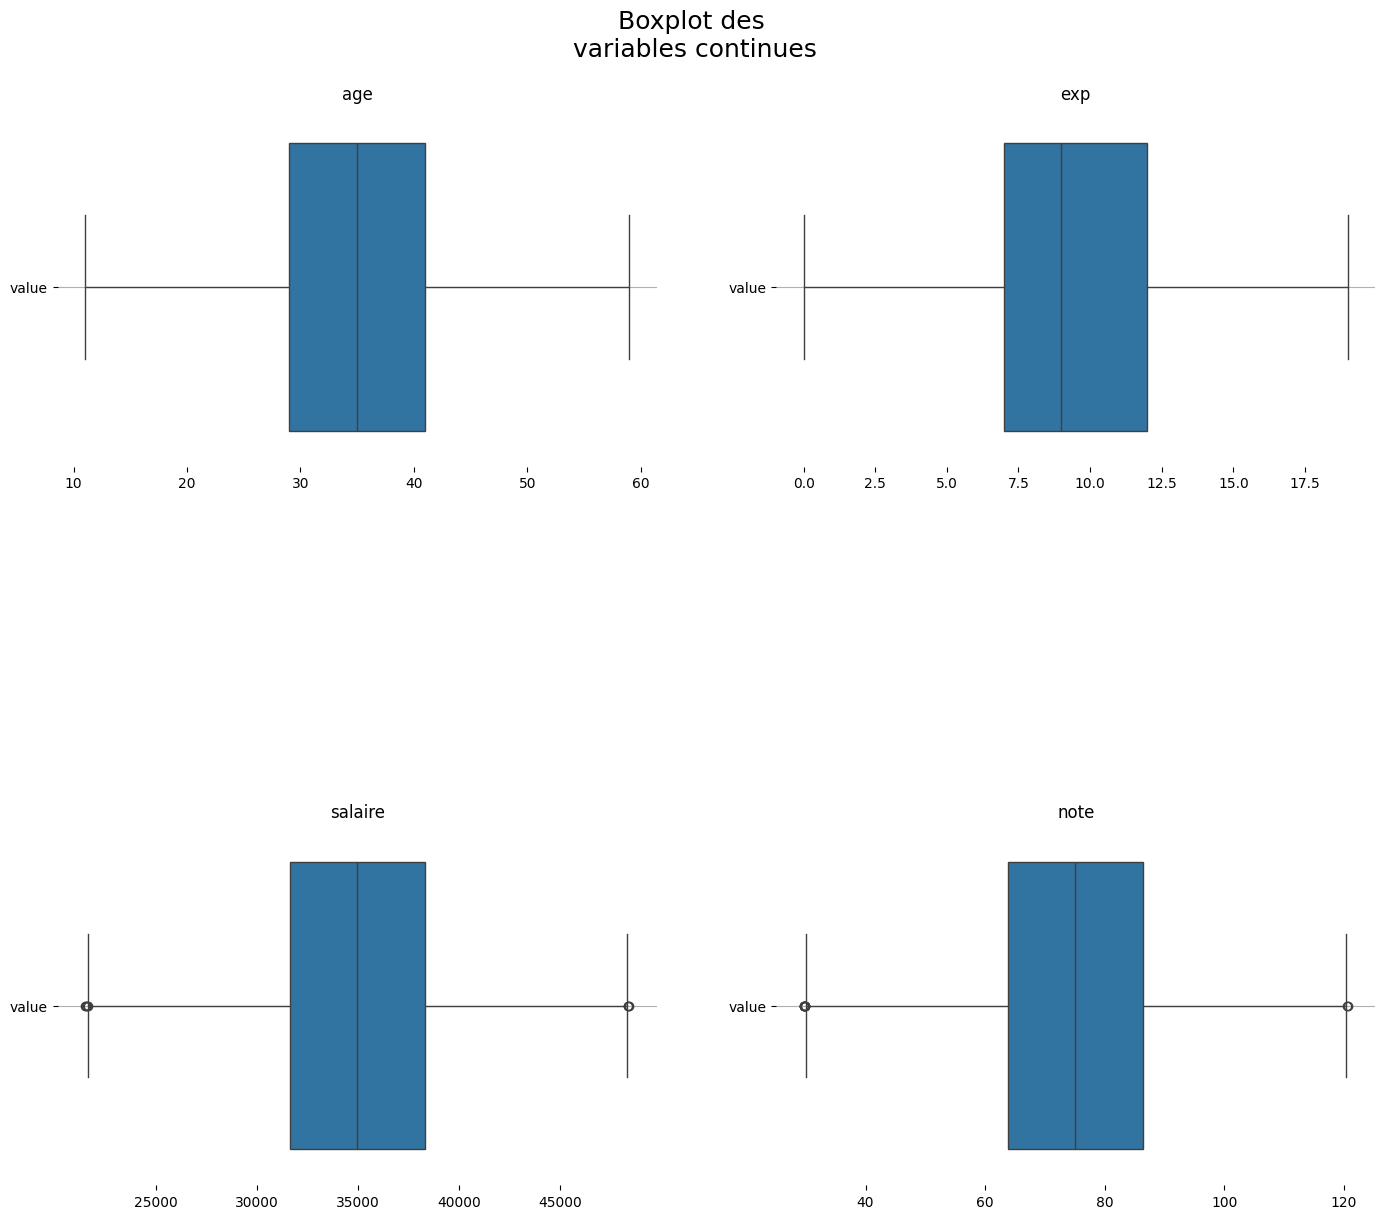

In [88]:

# On affiche les boxplots sans les valeurs "extrêmes"

# Sélectionne toutes les colonnes booléennes ou indicatrices d'outliers
cols_outliers = [col for col in df.columns if col.endswith("_is_outliers")]

# Crée un masque : True si AUCUNE de ces colonnes ne vaut 1
mask_no_outlier = (df[cols_outliers] != 1).all(axis=1)

# Filtre le DataFrame
df_sans_outlier = df[mask_no_outlier]


temp=pd.melt(df_sans_outlier [col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
print(temp.head())
 
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):

    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


In [89]:
# Que pouvez-vous conclure ?

Cette méthode n’est pas adaptée à l’ensemble des variables numériques.
Par exemple, pour la variable note, la limite supérieure devrait être fixée à 100, conformément à la définition de la variable.
De plus, elle se révèle trop restrictive pour certaines variables comme expérience : elle considère comme extrêmes les valeurs dépassant 20 ans, alors qu’en pratique cela reste tout à fait plausible. Ces observations ne devraient donc pas être exclues.

In [90]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux et nombre
#            de valeurs manquantes de chaque variable
#            par ordre décroissant

def display_missing_values_bis(df):
    missing_prct = df.isna().mean()*100
    missing_nb = df.isna().sum()

    missing_df = pd.DataFrame({
    "missing_nb": missing_nb,
    "missing_prct": missing_prct
    }).sort_values("missing_prct", ascending=False)
    return missing_df

display_missing_values_bis(df)

,missing_nb,missing_prct
note,114,0.570
exp,106,0.530
salaire,105,0.525
age,101,0.505
date,91,0.455
note_imputation_moyenne,0,0.000
salaire_is_outliers,0,0.000
exp_is_outliers,0,0.000
age_is_outliers,0,0.000
note_imputation_regression,0,0.000


Comme pour les variables catégorielles, le nombre de valeurs manquantes est dérisoire, moins de 1% pour la colonne ayant le plus de valeurs manquantes.

### <span style="color:#011C5D">7. Encodage des variables categorielles </span>

In [ ]:
# EXERCICE : Utiliser une methode adequate pour encoder les variables categorielles
df_encoded = pd.get_dummies(df, columns=col_categoricals, drop_first=True)

df_encoded.head()



,date,age,exp,salaire,note,dispo,embauche,age_imputation_moyenne,exp_imputation_moyenne,salaire_imputation_moyenne,...,sexe_M,sexe_Non-défini,diplome_bac,diplome_doctorat,diplome_licence,diplome_master,specialite_archeologie,specialite_detective,specialite_forage,specialite_geologie
0,2012-06-02,25,9,26803.0,97.08,True,False,25,9,26803.0,...,False,False,False,False,True,False,False,False,False,True
1,2011-04-21,35,13,38166.0,63.86,True,False,35,13,38166.0,...,True,False,False,False,True,False,False,False,True,False
2,2012-09-07,29,13,35207.0,78.50,True,False,29,13,35207.0,...,True,False,False,False,True,False,False,False,False,True
3,2011-07-01,<NA>,12,32442.0,45.09,True,False,35,12,32442.0,...,True,False,False,False,True,False,False,False,False,True
4,2012-08-07,35,6,28533.0,81.91,True,False,35,6,28533.0,...,False,False,False,False,True,False,False,True,False,False


In [92]:
bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           19909 non-null  datetime64[ns]
 1   age                            19899 non-null  Int64         
 2   exp                            19894 non-null  Int64         
 3   salaire                        19895 non-null  float64       
 4   note                           19886 non-null  float64       
 5   dispo                          20000 non-null  int32         
 6   embauche                       20000 non-null  int32         
 7   age_imputation_moyenne         20000 non-null  Int64         
 8   exp_imputation_moyenne         20000 non-null  Int64         
 9   salaire_imputation_moyenne     20000 non-null  float64       
 10  note_imputation_moyenne        20000 non-null  float64       
 11  age_imputation_

J’ai choisi d’utiliser le One-Hot Encoding, car les modalités ne présentent pas d’ordinalité et la taille du jeu de données reste suffisamment limitée pour éviter une explosion du nombre de variables.

### <span style="color:#011C5D">8. Encodage des variables categorielles Embedding </span>

In [93]:
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder

In [94]:
# Exemple variable
VARIABLE = "cheveux"
df[VARIABLE] = df[VARIABLE].fillna("Missing")
MODALITE = df[VARIABLE].unique()
NB_MODALITE = len(MODALITE)
NB_MODALITE,MODALITE

(5, array(['roux', 'blond', 'brun', 'chatain', 'Non-défini'], dtype=object))

In [95]:
DIM_EMBEDDING = 10

In [96]:
# Exemple d'embedding avec des weights aleatoire non entraine sur une dataset
embedding = nn.Embedding(NB_MODALITE, DIM_EMBEDDING) 

In [97]:
df[VARIABLE+"_label_encoded"] = LabelEncoder().fit_transform(df[VARIABLE]) # On donne un identifiant propre à chaqu emodalité

In [98]:
df[[VARIABLE,VARIABLE+"_label_encoded"]].head()

,cheveux,cheveux_label_encoded
0,roux,4
1,blond,1
2,blond,1
3,brun,2
4,roux,4


In [99]:
variable_to_torch = torch.tensor(df[VARIABLE+"_label_encoded"].values.tolist())  # Creation d'un tenseur avec tt id des modalités de la colonne "cheveux"

In [100]:
embeddings = embedding(variable_to_torch) # Le coeur du réacteur : remplace les identifiant pas les embeddings (les vecteurs) correspondants

In [101]:
embeddings

tensor([[ 0.1163,  1.5785, -0.1557,  ...,  0.3615, -0.3471, -0.4394],
        [ 1.2962, -0.7991,  0.8258,  ...,  1.9010,  0.0642,  1.3527],
        [ 1.2962, -0.7991,  0.8258,  ...,  1.9010,  0.0642,  1.3527],
        ...,
        [-0.0900,  0.5483,  1.0336,  ...,  1.0749, -0.3116,  1.9980],
        [-0.0900,  0.5483,  1.0336,  ...,  1.0749, -0.3116,  1.9980],
        [-0.8331, -1.7536,  0.3559,  ..., -1.5187, -1.0947, -0.4506]],
       grad_fn=<EmbeddingBackward0>)

In [102]:
embeddings.shape 

torch.Size([20000, 10])

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pltg

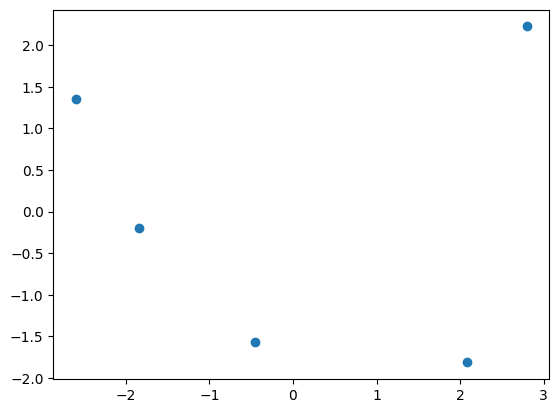

In [104]:
### Visualisation des embeddings
embeddings_weight = embedding.weight.data.numpy() # transforme le tenseur en numpy 
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_weight)


plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.show()

### <span style="color:#011C5D">9. Créer votre package python </span>

    - Step 1 : Créer un fichier analyse_exploratoire.py
    - Step 2 : Copier toutes les fonctions de ce notebook dans votre fichier fichier analyse_exploratoire.py
    - Step 3 : Créer un dossier src
    - Step 4 : Deplacer votre fichier analyse_exploratoire.py dans le dossier src
    - Step 5 : Créer un nouveau notebook
    - Step 6 : Dans ce notebook, specifier le chemin vers votre dossier src
    - Step 7 : Executer 'from  analyse_exploratoire import is_outlier, display_missing_values etc...
    - Step 8 : Analyser vos données avec ces nouvelles fonction

## Ressources

Imputation:

- [Imputation Iterrative](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) 
- [Imputation](https://scikit-learn.org/stable/modules/impute.html) 

Outliers:

- [Doc sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [Doc Medium](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)